In [1]:
# importing of necessary modules

In [2]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics

In [3]:
# select columns for features and target variable

In [4]:
pima = pd.read_csv("/content/diabetes.csv")
selected_columns = ['Pregnancies',	'Glucose'	,'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[selected_columns]
y = pima['Outcome']

In [5]:
# from google.colab import drive
# drive.mount('/content/drive/MyDrive/diabetes.csv')

In [6]:
#split the data into train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
#fit the model with training data
#predict the target values for the test set

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

In [10]:
#calculate and performance matrix

In [11]:
print("Precision = ", metrics.precision_score(y_predict, y_test))
print("Recall = " ,metrics.recall_score(y_predict, y_test))
print("Accuracy = ", metrics.accuracy_score(y_predict, y_test))
print("F1-score = ", metrics.f1_score(y_predict, y_test))

Precision =  0.5529411764705883
Recall =  0.6025641025641025
Accuracy =  0.7012987012987013
F1-score =  0.5766871165644172


In [12]:
#create a confusion. matrix and visualise using heatmap

[[115  38]
 [ 31  47]]


<Axes: >

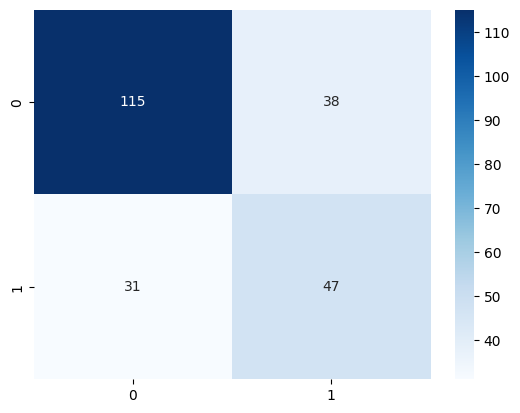

In [13]:
cf_matrix = metrics.confusion_matrix(y_predict, y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = 'g')

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# New Section

In [15]:
#visualize decision tree and export it as png

In [16]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = selected_columns, class_names = ['0', '1'])

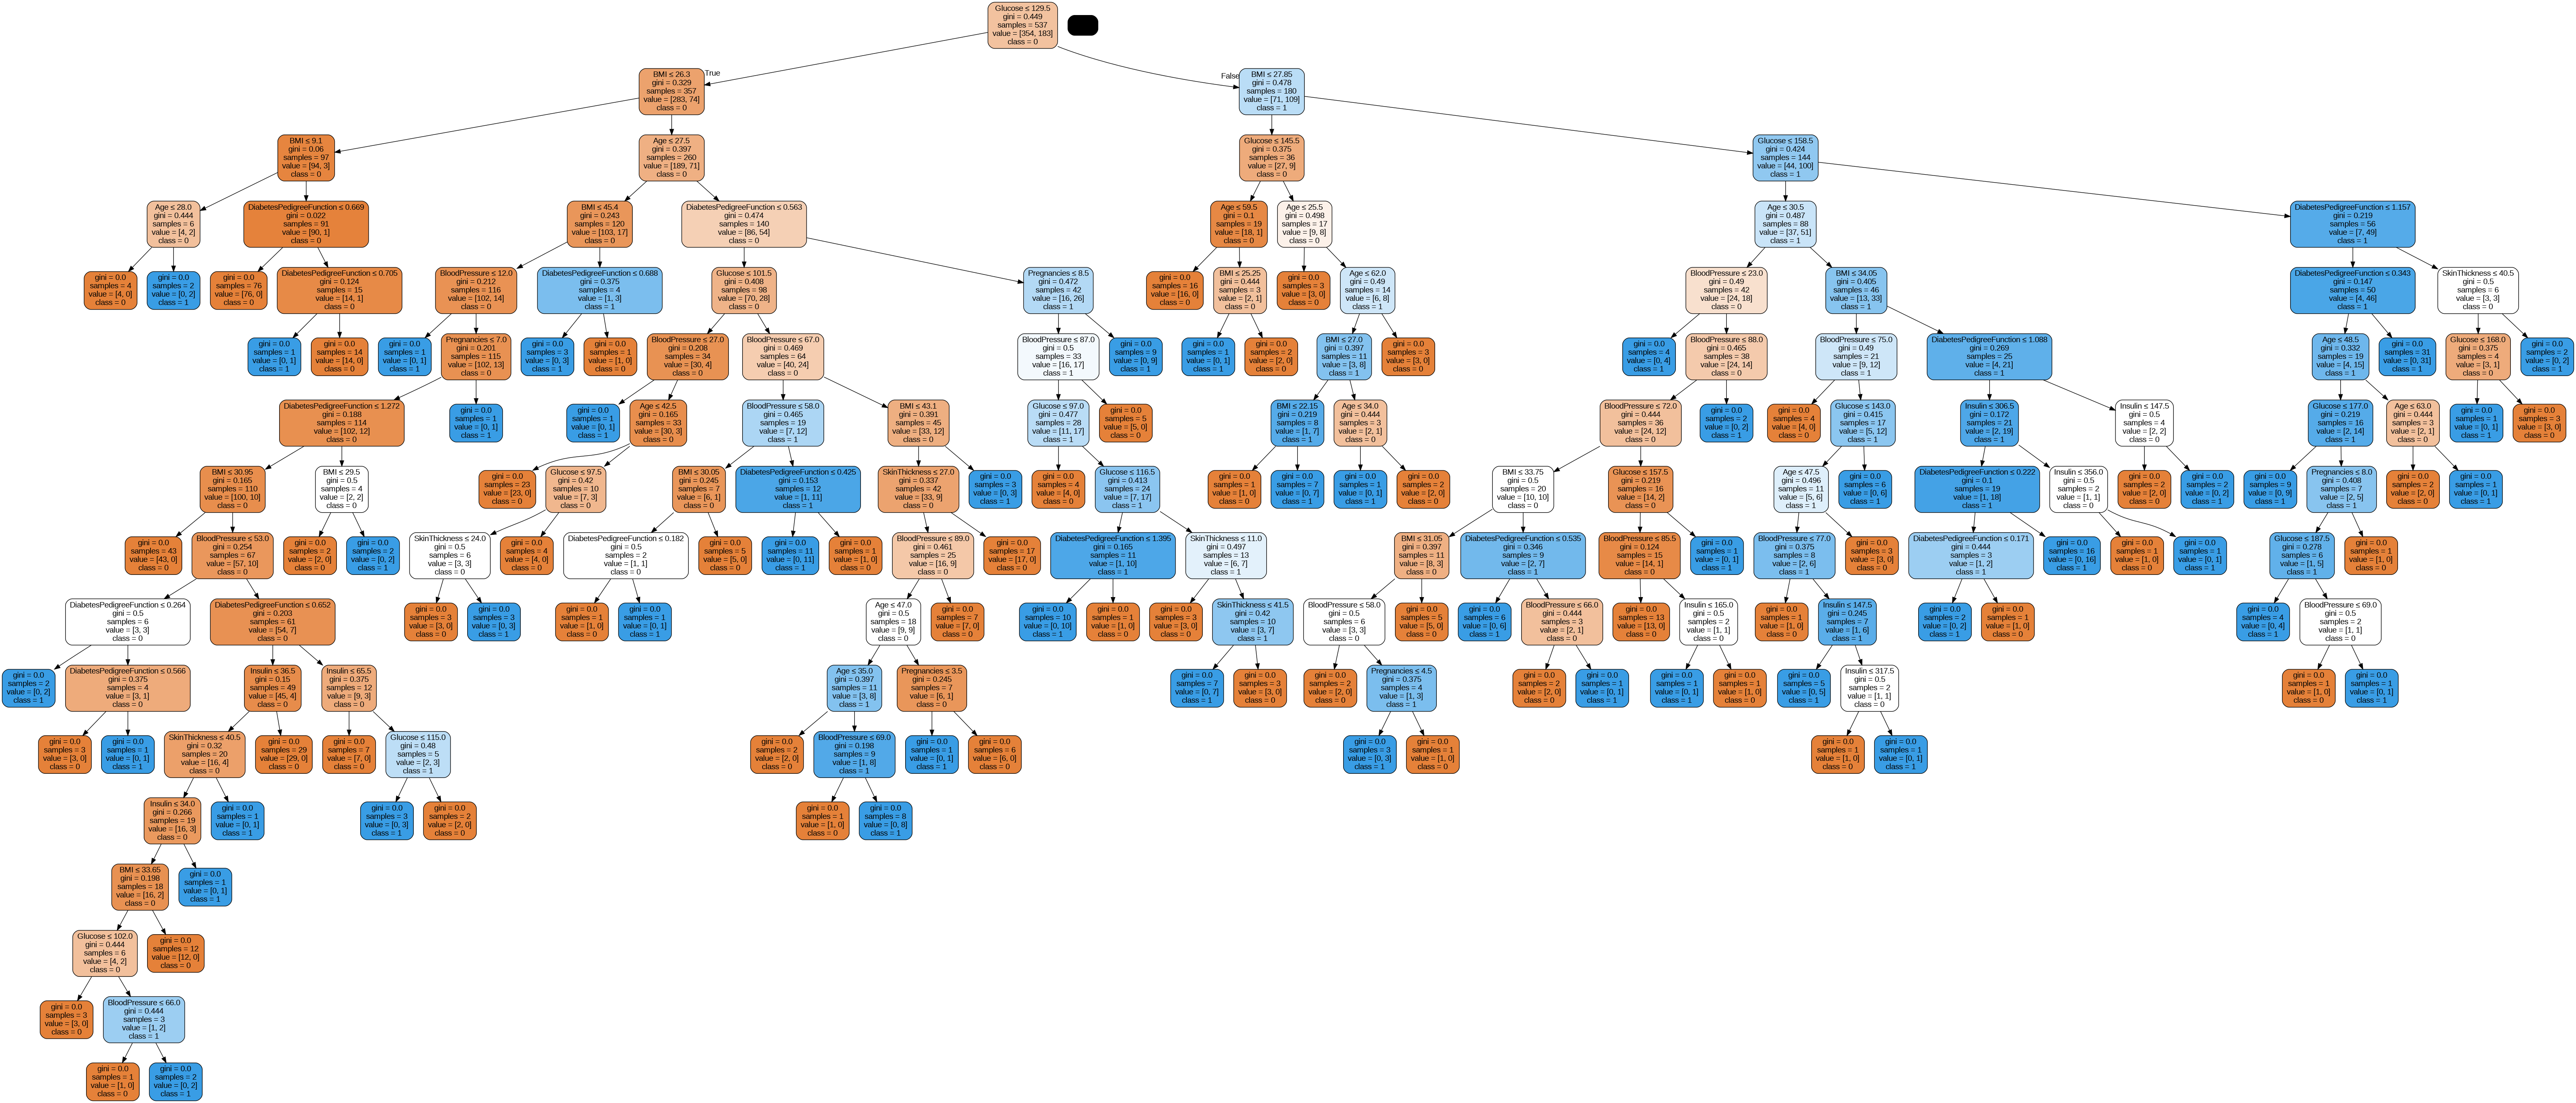

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('diabetes.png')
Image(graph.create_png())

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

In [20]:
print("Precision = ", metrics.precision_score(y_predict, y_test))
print("Recall = ", metrics.recall_score(y_predict, y_test))
print("Accuracy = ", metrics.accuracy_score(y_predict, y_test))
print("F1-score = ", metrics.f1_score(y_predict, y_test))

Precision =  0.6352941176470588
Recall =  0.7105263157894737
Accuracy =  0.7705627705627706
F1-score =  0.6708074534161491


In [21]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

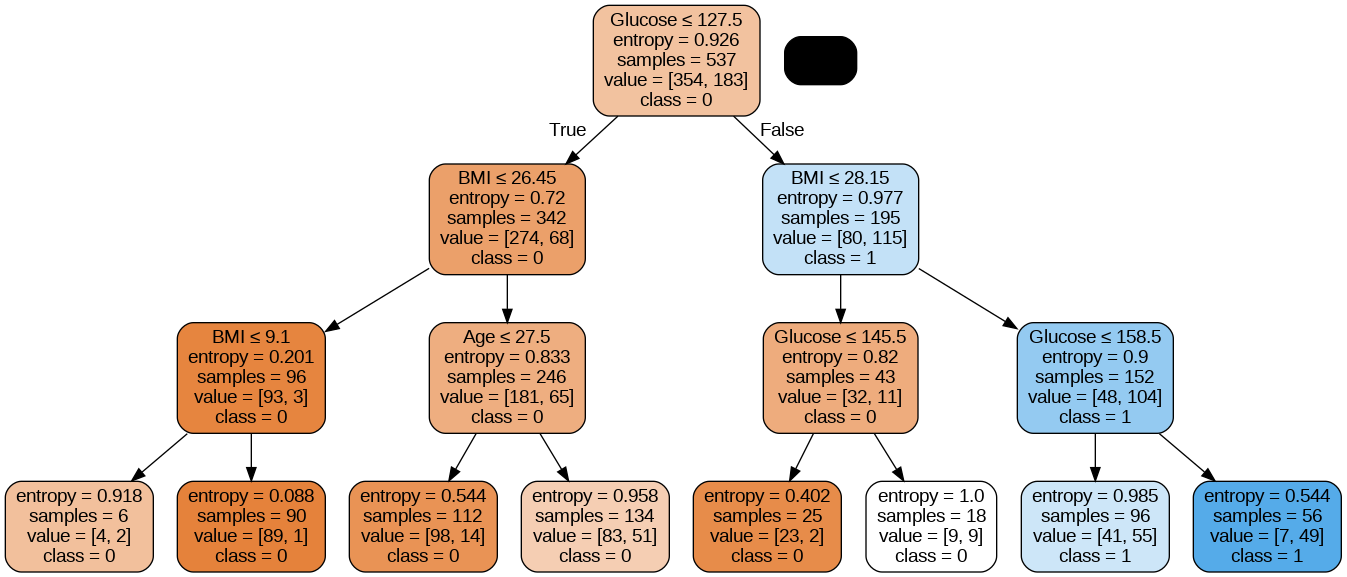

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = selected_columns, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('diabetes.png')
Image(graph.create_png())

In [23]:
import numpy as np
# input = (0,162,76,56,100,53.2,0.759,25)
input = (1,	85,	66,	29,	0,	26.6,	0.351,	31)
# 15,136,70,32,110,37.1,0.153,43 - diabetic
# 5,137,108,0,0,48.8,0.227,37 - diabetic
input_array = np.asarray(input)
reshaped_array = input_array.reshape(1,-1)
prediction = dtree.predict(reshaped_array)
if(prediction[0]== 1):
  print('Diabetic \n')
else:
  print("Not diabetic")


Not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
